# **IsolationForest Model Theory**


## Isolation Forest

---

## Theory
Isolation Forest is an unsupervised anomaly detection algorithm that isolates anomalies instead of profiling normal data points. It is based on the principle that anomalies are few and different, making them easier to isolate compared to normal points. The algorithm builds an ensemble of isolation trees (iTrees) and uses the average path length to identify anomalies. It is widely used in fraud detection, network security, and outlier detection.

The main idea is to:
- Randomly select a feature and split value to partition the data.
- Repeat the process recursively until all points are isolated.
- Use the average path length to determine the anomaly score.

---

## Mathematical Foundation
- **Isolation Tree (iTree)**:
  A binary tree where each node represents a split on a randomly selected feature and split value:
  - Split until all points are isolated or a maximum tree depth is reached.

- **Path Length**:
  The number of edges from the root node to a leaf node:
  - Anomalies have shorter path lengths because they are easier to isolate.

- **Anomaly Score**:
  The anomaly score \( s \) for a data point \( x \) is computed as:
  $$ s(x, n) = 2^{-\frac{E(h(x))}{c(n)}} $$
  - \( E(h(x)) \): Average path length of \( x \) across all iTrees.
  - \( c(n) \): Normalization factor for a dataset of size \( n \):
    $$ c(n) = 2H(n-1) - \frac{2(n-1)}{n} $$
    - \( H(n) \): Harmonic number (\( H(n) \approx \ln(n) + 0.5772 \)).

- **Decision Rule**:
  - If \( s(x, n) \approx 1 \): \( x \) is an anomaly.
  - If \( s(x, n) \approx 0 \): \( x \) is normal.

---

## Algorithm Steps
1. **Build iTrees**:
   - Randomly select a subset of the data.
   - Build an isolation tree by recursively splitting the data until all points are isolated or the maximum depth is reached.

2. **Compute Path Lengths**:
   - For each data point, compute its path length in each iTree.

3. **Calculate Anomaly Scores**:
   - Compute the average path length and anomaly score for each data point.

4. **Identify Anomalies**:
   - Classify points with high anomaly scores as anomalies.

---

## Key Parameters
- **n_estimators**: The number of isolation trees to build.
- **max_samples**: The number of samples to use for building each tree.
- **contamination**: The proportion of anomalies in the dataset.
- **max_features**: The number of features to consider for splitting.

---

## Advantages
- Efficient for high-dimensional datasets.
- Works well with large datasets.
- Does not require labeled data (unsupervised).
- Robust to noise and outliers.

---

## Disadvantages
- Struggles with datasets where anomalies are not well-separated.
- Sensitive to the choice of parameters (e.g., `max_samples`, `contamination`).
- May produce false positives if the dataset has complex structures.

---

## Implementation Tips
- Use **grid search** or **cross-validation** to tune parameters like `n_estimators` and `max_samples`.
- Set `contamination` based on domain knowledge or exploratory analysis.
- Use **feature scaling** to ensure equal contribution from all features.
- Combine with other anomaly detection methods for improved performance.

---

## Applications
- Fraud detection
- Network security (intrusion detection)
- Outlier detection in datasets
- Quality control in manufacturing
- Healthcare (e.g., detecting rare diseases)

Isolation Forest is a powerful and efficient algorithm for anomaly detection. While it requires careful parameter tuning, it is a valuable tool for many real-world applications.

## **Model Evaluation for Isolation Forest**

### 1. Anomaly Score

**Formula:**
$$
s(x) = 2^{-\frac{E(h(x))}{c(n)}}
$$
where:
- \(E(h(x))\) is the average path length of an instance \(x\).
- \(c(n)\) is the average path length of an unsuccessful search in a binary search tree.
- \(n\) is the number of samples.

**Description:**
- The anomaly score determines how isolated a data point is.
- A higher score indicates a higher likelihood of an anomaly.

**Interpretation:**
- Scores close to **1** indicate strong anomalies.
- Scores around **0.5** suggest uncertainty.
- Scores close to **0** indicate normal instances.

---

### 2. Confusion Matrix (for labeled data)

**Description:**
- If labeled anomalies exist, a **confusion matrix** helps evaluate classification performance.

**Interpretation:**
- True Positives (TP): Correctly identified anomalies.
- False Positives (FP): Normal points misclassified as anomalies.
- True Negatives (TN): Correctly identified normal points.
- False Negatives (FN): Anomalies misclassified as normal.

---

### 3. Precision

**Formula:**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Description:**
- Measures how many detected anomalies are actually anomalies.

**Interpretation:**
- A high precision means fewer false alarms.

---

### 4. Recall

**Formula:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Description:**
- Measures the model's ability to detect all anomalies.

**Interpretation:**
- A high recall means fewer missed anomalies.

---

### 5. F1-Score

**Formula:**
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Description:**
- A balance between precision and recall.

**Interpretation:**
- A higher F1-score means better anomaly detection performance.

---

### 6. Receiver Operating Characteristic (ROC) Curve & AUC

**Description:**
- ROC Curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.
- AUC (Area Under Curve) measures overall classification performance.

**Interpretation:**
- **AUC = 1** → Perfect detection.
- **AUC > 0.8** → Good performance.
- **AUC = 0.5** → Random performance.

---

### 7. Adjusting Contamination Parameter

**Description:**
- The contamination parameter (\(\text{contamination}\)) defines the proportion of anomalies in the dataset.

**Interpretation:**
- A well-chosen contamination value improves model performance.
- **Too high** → More false positives.
- **Too low** → More false negatives.

---

### 8. Silhouette Score (for Unsupervised Evaluation)

**Formula:**
$$
S = \frac{b - a}{\max(a, b)}
$$
where:
- \(a\) is the average intra-cluster distance.
- \(b\) is the average nearest-cluster distance.

**Description:**
- Measures how well-separated the anomalies are.

**Interpretation:**
- Higher values (\(\approx 1\)) indicate well-separated anomalies.

---

### 9. k-Fold Cross Validation

**Description:**
- Splits the dataset into \(k\) subsets, training the model on \(k-1\) folds and testing on the remaining one.

**Interpretation:**
- Reduces overfitting risk.
- Provides more reliable performance estimates.

---


## Isolation Forest

### class sklearn.ensemble.IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

| **Parameter**               | **Description**                                                                                                     | **Default**      |
|----------------------------|--------------------------------------------------------------------------------------------------------------------|------------------|
| n_estimators               | The number of base estimators (trees) in the ensemble.                                                              | 100              |
| max_samples                | The number of samples to draw from X to train each base estimator. 'auto' means `min(256, n_samples)`.              | 'auto'           |
| contamination              | The proportion of outliers in the data. If 'auto', it is determined using the assumption that 10% of the data are outliers. | 'auto'           |
| max_features               | The number of features to draw from X to train each base estimator.                                                 | 1.0              |
| bootstrap                  | Whether to use bootstrapping for training samples.                                                                 | False            |
| n_jobs                     | Number of CPU cores used during training. `None` means 1 core, `-1` uses all available cores.                      | None             |
| random_state               | Seed for the random number generator.                                                                               | None             |
| verbose                    | Controls verbosity of output.                                                                                       | 0                |
| warm_start                 | If `True`, reuse previous trees when fitting new data.                                                              | False            |

-

| **Attribute**              | **Description**                                                                                                     |
|----------------------------|--------------------------------------------------------------------------------------------------------------------|
| estimators_                | The collection of fitted base estimators (trees).                                                                 |
| estimators_features_       | The subset of features used for each base estimator.                                                              |
| max_samples_               | The actual number of samples used for training each base estimator.                                               |
| offset_                    | The threshold to determine outliers.                                                                              |
| n_features_in_             | Number of features seen during fitting.                                                                           |

-

| **Method**                 | **Description**                                                                                                     |
|----------------------------|--------------------------------------------------------------------------------------------------------------------|
| fit(X[, y])                | Fit the model from data in X.                                                                                      |
| predict(X)                 | Predict if a sample is an outlier (`-1`) or an inlier (`1`).                                                       |
| decision_function(X)       | Compute the average anomaly score of the trees for samples in X.                                                  |
| score_samples(X)           | Return the anomaly score for each sample in X.                                                                    |
| fit_predict(X[, y])        | Fit the model and predict outliers on the same data.                                                              |

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)


# IsolationForest - Example

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Data Loading
data = load_iris()
X = data.data
y = data.target

# Use only one class (e.g., class 0) and treat the rest as outliers
X_class_0 = X[y == 0]
y_class_0 = y[y == 0]

# Data Processing
df = pd.DataFrame(X_class_0, columns=data.feature_names)
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


##  Data processing

In [2]:

print("\nChecking for missing values:")
print(df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_class_0)




Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


## Plotting data

## Model definition

In [3]:

# Model Definition
contamination = 0.1  # Expected proportion of outliers
isolation_forest = IsolationForest(contamination=contamination, random_state=42)

# Model Training
isolation_forest.fit(X_scaled)

# Model Evaluation
y_pred = isolation_forest.predict(X_scaled)



## Model evaulation


Confusion Matrix:
[[ 5 45]
 [ 0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        50
           1       0.00      0.00      0.00         0

    accuracy                           0.10        50
   macro avg       0.50      0.05      0.09        50
weighted avg       1.00      0.10      0.18        50



/home/petar-ubuntu/Learning/ML_Theory/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/petar-ubuntu/Learning/ML_Theory/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/petar-ubuntu/Learning/ML_Theory/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

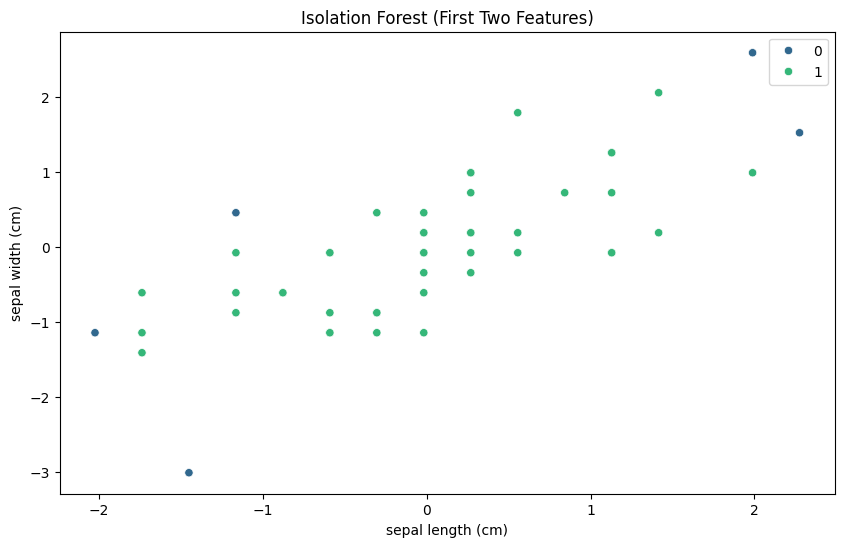

In [5]:
# Convert predictions to binary labels (0 for inliers, 1 for outliers)
y_pred = np.where(y_pred == 1, 0, 1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_0, y_pred))

print("\nClassification Report:")
print(classification_report(y_class_0, y_pred))

# Data Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette='viridis')
plt.title('Isolation Forest (First Two Features)')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()